In [24]:
# import all libary

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [29]:
# read the data 
data = pd.read_csv("campusplacement.csv")

In [30]:
# print the data
data.head()

,Gender,SSC Percentage,HSC Percentage,HSC Stream,Graduation Percentage,Graduation Stream,Master's Percentage,Specialisation,Internship Experience,Status
0,1,67.00,91.00,Commerce,58.00,Sci&Tech,58.80,Mkt&HR,Yes,Placed
1,0,79.33,78.33,Science,77.48,Sci&Tech,66.28,Mkt&Fin,Yes,Placed
2,1,65.00,68.00,Arts,64.00,Comm&Mgmt,57.80,Mkt&Fin,Yes,Placed
3,0,25.00,52.00,Science,52.00,Sci&Tech,60.00,Mkt&HR,No,Not Placed
4,0,85.80,73.60,Commerce,73.30,Comm&Mgmt,55.50,Mkt&Fin,Yes,Placed


In [31]:
#to create duplicate copy
cp_copy = data.copy()

In [32]:
df_copy= data.copy()
df_copy.head()

,Gender,SSC Percentage,HSC Percentage,HSC Stream,Graduation Percentage,Graduation Stream,Master's Percentage,Specialisation,Internship Experience,Status
0,1,67.00,91.00,Commerce,58.00,Sci&Tech,58.80,Mkt&HR,Yes,Placed
1,0,79.33,78.33,Science,77.48,Sci&Tech,66.28,Mkt&Fin,Yes,Placed
2,1,65.00,68.00,Arts,64.00,Comm&Mgmt,57.80,Mkt&Fin,Yes,Placed
3,0,25.00,52.00,Science,52.00,Sci&Tech,60.00,Mkt&HR,No,Not Placed
4,0,85.80,73.60,Commerce,73.30,Comm&Mgmt,55.50,Mkt&Fin,Yes,Placed


In [33]:
# shape of data like rows and cloumn
df_copy.shape

(12561, 10)

In [34]:
# to print the4 data types of that column name
df_copy.dtypes

Gender                     int64
SSC Percentage           float64
HSC Percentage           float64
HSC Stream                object
Graduation Percentage    float64
Graduation Stream         object
Master's Percentage      float64
Specialisation            object
Internship Experience     object
Status                    object
dtype: object

In [35]:
#how tovheck null values
df_copy.isnull().sum()

Gender                   0
SSC Percentage           0
HSC Percentage           0
HSC Stream               0
Graduation Percentage    0
Graduation Stream        0
Master's Percentage      0
Specialisation           0
Internship Experience    0
Status                   0
dtype: int64

In [36]:
df_copy.isnull().sum()

Gender                   0
SSC Percentage           0
HSC Percentage           0
HSC Stream               0
Graduation Percentage    0
Graduation Stream        0
Master's Percentage      0
Specialisation           0
Internship Experience    0
Status                   0
dtype: int64

In [37]:
df_copy

,Gender,SSC Percentage,HSC Percentage,HSC Stream,Graduation Percentage,Graduation Stream,Master's Percentage,Specialisation,Internship Experience,Status
0,1,67.00,91.00,Commerce,58.00,Sci&Tech,58.80,Mkt&HR,Yes,Placed
1,0,79.33,78.33,Science,77.48,Sci&Tech,66.28,Mkt&Fin,Yes,Placed
2,1,65.00,68.00,Arts,64.00,Comm&Mgmt,57.80,Mkt&Fin,Yes,Placed
3,0,25.00,52.00,Science,52.00,Sci&Tech,60.00,Mkt&HR,No,Not Placed
4,0,85.80,73.60,Commerce,73.30,Comm&Mgmt,55.50,Mkt&Fin,Yes,Placed
...,...,...,...,...,...,...,...,...,...,...
12556,1,86.20,47.00,Science,57.00,Comm&Mgmt,60.48,Mkt&HR,No,Not Placed
12557,0,83.00,74.00,Science,66.00,Comm&Mgmt,58.46,Mkt&HR,Yes,Placed
12558,1,80.92,78.50,Commerce,67.00,Comm&Mgmt,60.99,Mkt&Fin,Yes,Placed
12559,1,84.00,47.00,Commerce,72.70,Sci&Tech,57.46,Mkt&HR,No,Not Placed


Text(0.5, 1.0, 'UG percentage')

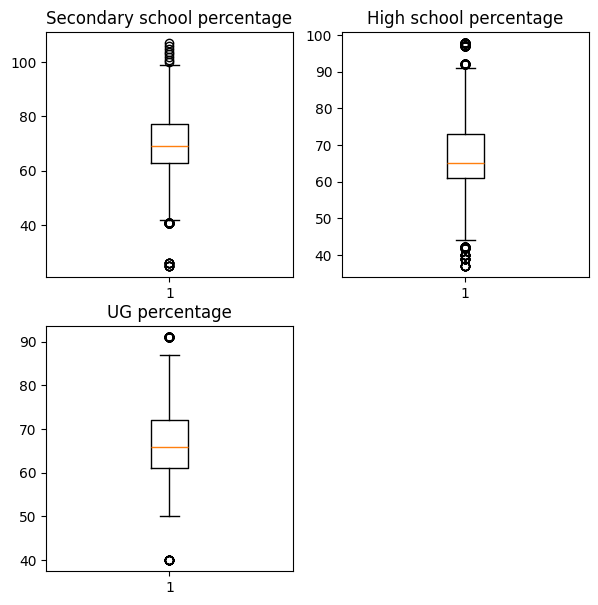

In [12]:
#how to handle Outlier plotting bocplot to identify the outlier

plt.figure(figsize=(7,7)) # it is a size of graph
ax=plt.subplot(221) #it means 22 means 2 * 2 matrix it means have 4 graph and 1 is represnting pointing of the first graph
plt.boxplot(df_copy['SSC Percenatge'])
ax.set_title('Secondary school percentage')

ax=plt.subplot(222) # 2 is represnting pointing of the second graph
plt.boxplot(df_copy['HSC Percentage'])
ax.set_title('High school percentage')

ax=plt.subplot(223)# 3 is represnting pointing of the 3 graph
plt.boxplot(df_copy['Graduation Percentage'])
ax.set_title('UG percentage')

Conclusion -- More outliers in second graph and remove that outlier and in case of 3rd figure there is one outlier and it is neglect because it doesnot affect our model.

In [38]:
Q1 = df_copy['HSC Percentage'].quantile(0.25) # it means first Quartile 
Q3 = df_copy['HSC Percentage'].quantile(0.75) #it means Third Quartile
IQR= Q3-Q1                                    # it is interquartile range

filter = (df_copy['HSC Percentage'] >= Q1-1.5*IQR) & (df_copy['HSC Percentage']<= Q3+1.5*IQR) # it filter or delete the otlier
df_filter =df_copy.loc[filter]                                              # it means New filter data


Q1 = df_copy['SSC Percentage'].quantile(0.25) # it means first Quartile 
Q3 = df_copy['SSC Percentage'].quantile(0.75) #it means Third Quartile
IQR= Q3-Q1                                    # it is interquartile range

filter = (df_copy['SSC Percentage'] >= Q1-1.5*IQR) & (df_copy['SSC Percentage']<= Q3+1.5*IQR) # it filter or delete the otlier
df_filter =df_copy.loc[filter]                                              # it means New filter data

{'whiskers': [<matplotlib.lines.Line2D at 0x201f9f81b90>,
 'caps': [<matplotlib.lines.Line2D at 0x201f9f830d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x201f9f812d0>],
 'medians': [<matplotlib.lines.Line2D at 0x201f9f90090>],
 'fliers': [<matplotlib.lines.Line2D at 0x201f9f90a50>],
 'means': []}

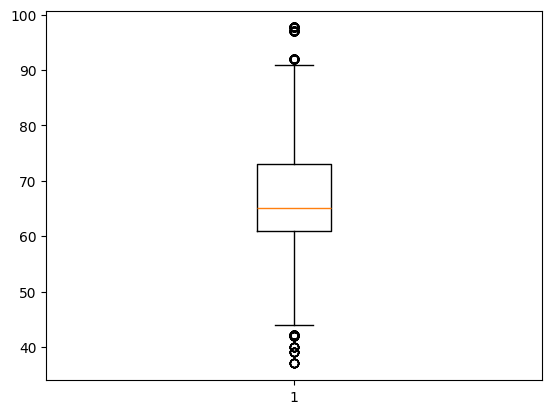

In [39]:
plt.boxplot(df_filter['HSC Percentage'])

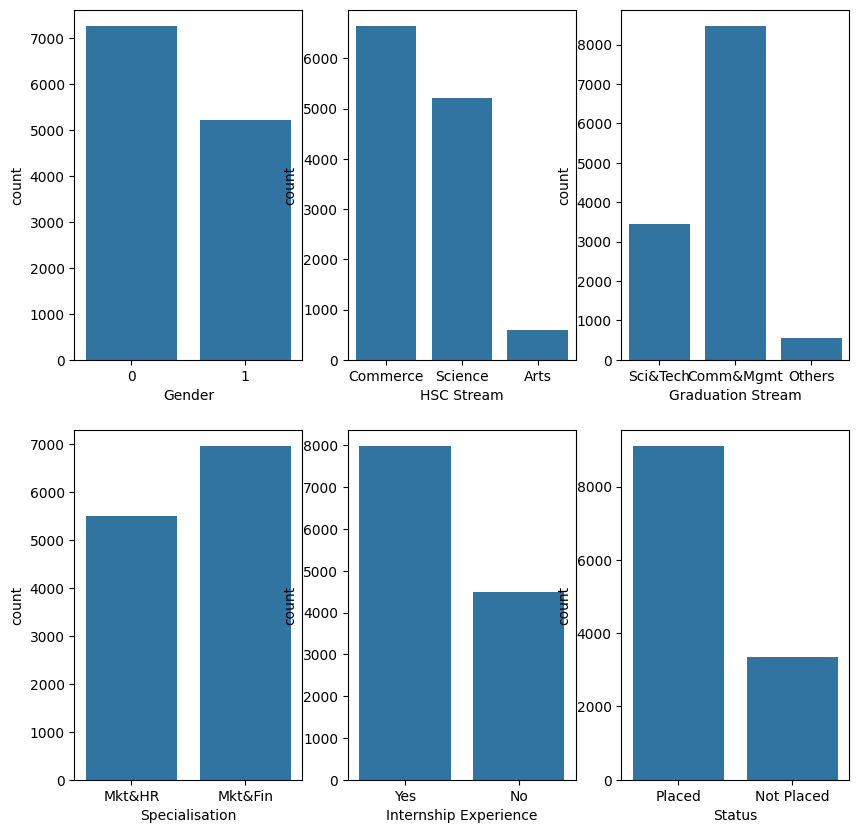

In [40]:
#data visualization

plt.figure(figsize=(10,10)) # it is a size of graph

plt.subplot(231) # it is 2 * 3 matrix
ax=sns.countplot(x='Gender', data =df_filter)

plt.subplot(232)
ax=sns.countplot(x='HSC Stream', data =df_filter)

plt.subplot(233)
ax=sns.countplot(x='Graduation Stream', data =df_filter)

plt.subplot(234)
ax=sns.countplot(x='Specialisation', data =df_filter)

plt.subplot(235)
ax=sns.countplot(x='Internship Experience', data =df_filter)

plt.subplot(236)
ax=sns.countplot(x='Status', data =df_filter)


In [41]:
#labelenconding
from sklearn.preprocessing import LabelEncoder

object_cols =['Internship Experience','Specialisation', 'Status']
label_encoder = LabelEncoder()

for col in object_cols:
    df_filter[col] = label_encoder.fit_transform(df_filter[col])
    
df_filter.head()

,Gender,SSC Percentage,HSC Percentage,HSC Stream,Graduation Percentage,Graduation Stream,Master's Percentage,Specialisation,Internship Experience,Status
0,1,67.00,91.00,Commerce,58.00,Sci&Tech,58.80,1,1,1
1,0,79.33,78.33,Science,77.48,Sci&Tech,66.28,0,1,1
2,1,65.00,68.00,Arts,64.00,Comm&Mgmt,57.80,0,1,1
4,0,85.80,73.60,Commerce,73.30,Comm&Mgmt,55.50,0,1,1
6,0,46.00,49.20,Commerce,79.00,Comm&Mgmt,50.00,0,0,1


In [42]:
#one hot encoding --- it means create news colums for different catogories like commmerece , arts , science in the given datasets 
dummy_hsc_s = pd.get_dummies(df_filter['HSC Stream'], prefix ='dummy')
dummy_degree_t= pd.get_dummies(df_filter['Graduation Stream'], prefix ='dummy')

df_coded= pd.concat([df_filter,dummy_hsc_s, dummy_degree_t  ] ,axis=1)
df_coded.drop(['HSC Stream', 'Graduation Stream'], axis=1, inplace= True)

df_coded.head()

,Gender,SSC Percentage,HSC Percentage,Graduation Percentage,Master's Percentage,Specialisation,Internship Experience,Status,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,67.00,91.00,58.00,58.80,1,1,1,False,True,False,False,False,True
1,0,79.33,78.33,77.48,66.28,0,1,1,False,False,True,False,False,True
2,1,65.00,68.00,64.00,57.80,0,1,1,True,False,False,True,False,False
4,0,85.80,73.60,73.30,55.50,0,1,1,False,True,False,True,False,False
6,0,46.00,49.20,79.00,50.00,0,0,1,False,True,False,True,False,False


In [43]:
x=df_coded.drop(['Status'],axis=1)  #predict vi machine then now is drop status column
y= df_coded.Status #it helps in placemnt prediction

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(x,y, test_size= 0.3, random_state =1) 

In [45]:
#random forest classifier
import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth =3, random_state = 42)

dtc.fit(X_train , y_train)
y_pred =dtc.predict(X_test)
print('acuuracy==', metrics.accuracy_score(y_test, y_pred))

acuuracy== 0.9315141787051899


In [46]:
import pickle
with open("model.pkl", "wb") as model_file:
  pickle.dump(dtc, model_file)

In [47]:
cm = sklearn.metrics.confusion_matrix(y_test,y_pred)

In [48]:
cm

array([[ 854,  133],
       [ 123, 2628]], dtype=int64)